# MSDS 430 Final Project

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

I am using King County (Greater Seattle) property sale price data and obtained from  
https://www.kaggle.com/harlfoxem/housesalesprediction. It has about 20 property features/details for 21613 residential property transactions between May 2014 and May 2015. 

**Here is what each column represents:**
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

id - Unique ID for each home sold  <br>
date - Date of the home sale  <br>
price - Price of each home sold  <br>
bedrooms - Number of bedrooms  <br>
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower  <br>
sqft_living - Square footage of the apartments interior living space  <br>
sqft_lot - Square footage of the land space  <br>
floors - Number of floors  <br>
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not  <br>
view - An index from 0 to 4 of how good the view of the property was  <br>
condition - An index from 1 to 5 on the condition of the apartment,  <br>
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.  <br>
sqft_above - The square footage of the interior housing space that is above ground level  <br>
sqft_basement - The square footage of the interior housing space that is below ground level  <br>
yr_built - The year the house was initially built  <br>
yr_renovated - The year of the house’s last renovation  <br>
zipcode - What zipcode area the house is in  <br>
lat - Lattitude  <br>
long - Longitude  <br>
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors  <br>
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors  <br>

I'm interested in knowing if the house sale price correlates to additional amenities such as the number of bedrooms, sq. ft. of living space, and other features.
Since there are a lot of features, I was able to down select property features from 21 to 9 (reduced columns by 57%) and able to remove outliers (reduced rows by 5%).  I have the following features: <br>

*         date
*         price
*         bedrooms
*         bathrooms
*         sqft_living
*         waterfront
*         view
*         geo indicators: latitude and longitude <br>

I would like to find answers to the following questions (my goals) for the final project: <br>

*         What month was the busiest month for selling houses? April, June, and July months were the busiest times.
*         Do a number of bedrooms stay as price increases? Studio and one-bedroom properties were available at a lower price. From two- to five-bedroom properties were available at any price range. 
*         What are the expensive neighborhoods? The most expensive neighborhoods were North Seattle, University of Washington, Mercer Island, Medina, Bellevue, Redmond, and properties along the waterfront area. Least expensive neighborhoods were South Seattle, further North Seattle, and properties away from water. 

### Read the file and prepare the data for analysis

In [1]:
## Read the csv file 
import pandas as pd
house = pd.read_csv('kc_house_data.csv')
house.head()

## Import most used packages packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Check missing values in the property dataset
house.isnull().sum()

# we don't have any missing/null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### I will use feature extraction to select important columns

In [3]:
## Use feature extraction to select important columns
## There are 21 features and they will be split into three categories: sqft, views-and-conditions, and the rest (price, rooms, and geographic indicators)

house_viewsConditions = house.iloc[:, house.columns.get_indexer(['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'])]
house_sqft = house.iloc[:, house.columns.get_indexer(['sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'])]
house_theRest = house.iloc[:, house.columns.get_indexer(['date','price', 'bedrooms', 'bathrooms', 'zipcode', 'lat', 'long'])]

In [4]:
## Feature extraction

## https://www.kaggle.com/sz8416/6-ways-for-feature-selection
## https://scikit-learn.org/stable/modules/feature_selection.html
## https://www.datacamp.com/community/tutorials/feature-selection-python

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y  = house_viewsConditions, house.price
chi_selector = SelectKBest(chi2, k=3)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(chi_feature)

X1, y = house_sqft, house.price
chi_selector = SelectKBest(chi2, k=3)
chi_selector.fit(X1, y)
chi_support = chi_selector.get_support()
chi_feature = X1.loc[:,chi_support].columns.tolist()
print(chi_feature)

['waterfront', 'view', 'yr_renovated']
['sqft_living', 'sqft_lot', 'sqft_lot15']


#### Feature extraction helped me to select the most important 9 features out of 21.

In [5]:
## Feature extraction helped me to identify the most important 6 features: ['waterfront', 'view', 'yr_renovated'] and ['sqft_living', 'sqft_lot', 'sqft_lot15']
## I can further down select and get top 3 features out of them: 'waterfront', 'view', 'sqft_living'
## Now there are top 3 features plus price, rooms, and geographic indicators. 

house_df = house.iloc[:, house.columns.get_indexer(['date','price', 'bedrooms', 'bathrooms', 'lat', 'long', 'waterfront', 'view', 'sqft_living'])]
print("A number of rows and columns of house: ", house.shape)
print("A number of rows and columns of house_df: ", house_df.shape)
house_df.head()

A number of rows and columns of house:  (21613, 21)
A number of rows and columns of house_df:  (21613, 9)


,date,price,bedrooms,bathrooms,lat,long,waterfront,view,sqft_living
0,20140502,313000.0,3,1.50,47.7658,-122.339,0,0,1340
1,20140502,2380000.0,5,2.50,47.6345,-122.367,0,4,3650
2,20140502,342000.0,3,2.00,47.3672,-122.151,0,0,1930
3,20140502,420000.0,3,2.25,47.6188,-122.114,0,0,2000
4,20140502,550000.0,4,2.50,47.6830,-122.114,0,0,1940


#### I was able to downsize the columns, now I need to remove the outliers from the rows:

In [6]:
## Able to downsize the columns, now outliers need to be removed from the rows
## Detect/identify outliers by calculating statistics for each row

house_df_analysis = house_df.drop(['date', 'lat','long'], axis=1)

stats = np.round(house_df_analysis.describe())
medians = house_df_analysis.median() # append medium calc to describe()
stats.loc['median'] = medians
stats

# waterfront has binary (0 and 1) and view has categorical (from 0 to 4) values. Statistical interpretations do not apply for them
# data skewed if the mean is not equal to the median: price and sqft_living values are skewed 
# Let's compare 75% percentile to a maximum value and spot outlier values such as bedrooms, bathrooms, price, and sqft_living

,price,bedrooms,bathrooms,waterfront,view,sqft_living
count,21613.0,21613.0,21613.00,21613.0,21613.0,21613.0
mean,540182.0,3.0,2.00,0.0,0.0,2080.0
std,367362.0,1.0,1.00,0.0,1.0,918.0
min,75000.0,0.0,0.00,0.0,0.0,290.0
25%,321950.0,3.0,2.00,0.0,0.0,1427.0
50%,450000.0,3.0,2.00,0.0,0.0,1910.0
75%,645000.0,4.0,2.00,0.0,0.0,2550.0
max,7700000.0,33.0,8.00,1.0,4.0,13540.0
median,450000.0,3.0,2.25,0.0,0.0,1910.0


In [7]:
## Out of curiosity I decided to look into this outlier sale a bit more to understand the type of property that was acquired.
house.sort_values('price').tail(1)

# Most expensive property was sold at a price of $7.7M million

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10532,6762700020,20141013,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


#### Now I can remove the extreme outliers 
A small number of high values (outliers) are skewing the distribution. So those outliers need to be removed. <br>
*I could have used the loop, but I would like to see the step by step process*

In [8]:
## https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
## Use percentile to see the extreme outliers

### house_df[house_df.price >= np.percentile(house_df.price, 99.95)]
### house_df[house_df.bedrooms >= np.percentile(house_df.bedrooms, 99.95)]
### house_df[house_df.bathrooms >= np.percentile(house_df.bathrooms, 99.95)]
### house_df[house_df.sqft_living >= np.percentile(house_df.sqft_living, 99.95)]

## Outliers can be removed by using percentile function. I could have used the loop, but I would like to see the step by step process:
house_df1 = house_df[house_df.price <= np.percentile(house_df.price, 95)]
house_df2 = house_df1[house_df1.bedrooms <= np.percentile(house_df1.bedrooms, 99.95)]
house_df3 = house_df2[house_df2.bathrooms <= np.percentile(house_df2.bathrooms, 99.95)]
house_df4 = house_df3[house_df3.sqft_living <= np.percentile(house_df3.sqft_living, 99.95)]

print(house_df.shape)
print(house_df4.shape)
# I was able to remove 1,094(5%) extreme oulier rows out of 21,613 rows

house_df4_analysis = house_df4.drop(['date', 'lat','long'], axis=1)
np.round(house_df4_analysis.describe())
# Run statistics once again after removing the outliers 

(21613, 9)
(20519, 9)


,price,bedrooms,bathrooms,waterfront,view,sqft_living
count,20519.0,20519.0,20519.0,20519.0,20519.0,20519.0
mean,479105.0,3.0,2.0,0.0,0.0,1978.0
std,211669.0,1.0,1.0,0.0,1.0,775.0
min,75000.0,0.0,0.0,0.0,0.0,290.0
25%,315000.0,3.0,2.0,0.0,0.0,1400.0
50%,438400.0,3.0,2.0,0.0,0.0,1860.0
75%,604000.0,4.0,2.0,0.0,0.0,2440.0
max,1160000.0,8.0,5.0,1.0,4.0,5670.0


#### Visualization and Analysis

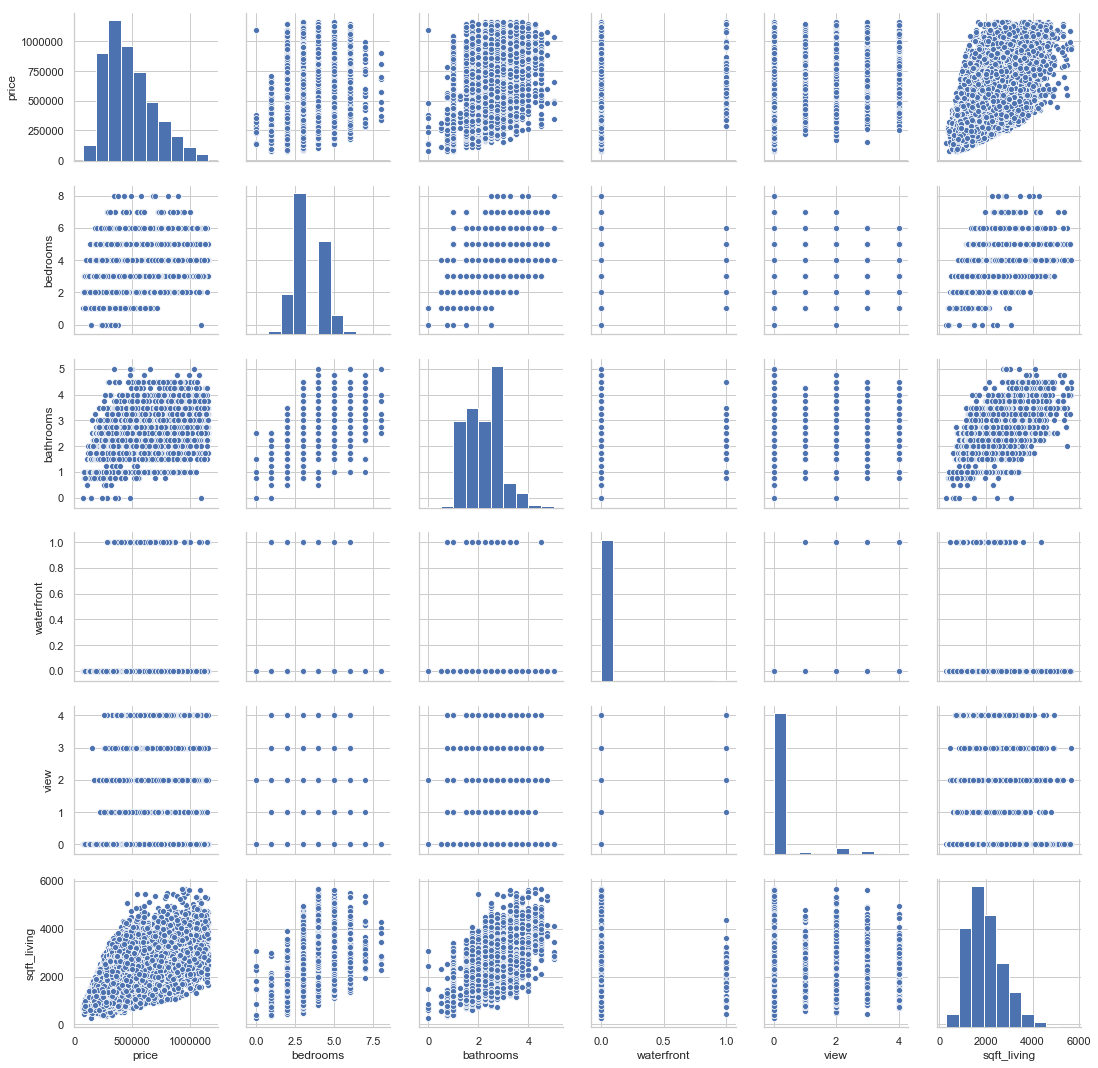

In [9]:
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=False)

sns.pairplot(house_df4_analysis, kind="scatter")
plt.show()

# Pair plot and scatter plot of the the dataset
# There are strong correlations bewteen proprty price and living space

In [10]:
X = house_df4_analysis.drop(['price'], axis=1)
y = house_df4_analysis.price
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X, y)
attributes_coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
attributes_coefficients

,Coefficient
bedrooms,-25490.210923
bathrooms,12945.978668
waterfront,52312.229508
view,43819.312150
sqft_living,174.350976


* Each one-unit increase in bedrooms causes a decrease of \$25,490 in the price.
* Each one-unit increase in bathrooms causes an increase of \$12,946 in the price.
* Each waterfront property causes an increase of \$52,312 in its price.
* Each one-unit increase in the view of a property causes an increase of \$43,819 in its price.
* Each square-footage increase in area causes an increase of \$174 in the price.

#### Price

Skewness of price: 4.021716
Kurtosis of price: 34.522444
Average price paid = $ 540182
Median price paid  = $ 450000


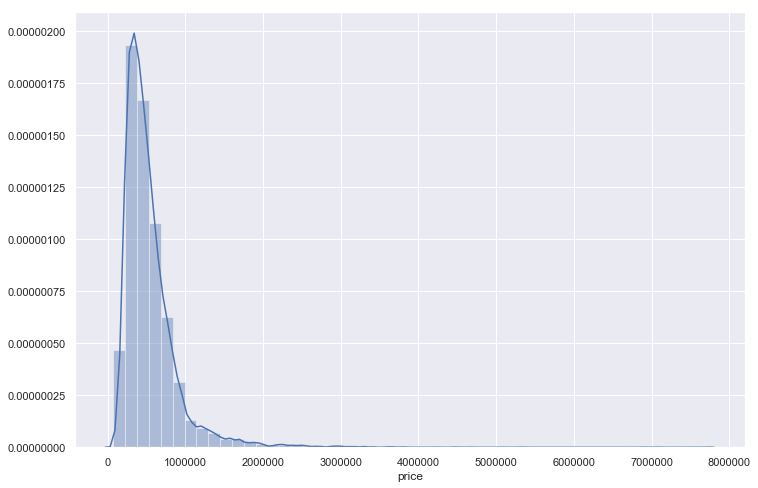

In [20]:
## histogram with outliers
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.distplot(house_df['price'])

## skewness, kurtosis, mean, and median values
print("Skewness of price: %f" % house_df.price.skew())
print("Kurtosis of price: %f" % house_df.price.kurt())
print('Average price paid = $ %d' % np.mean(house_df.price))
print('Median price paid  = $ %d' % np.median(house_df.price))

# Looking at the kurtosis score, we can see that there is a very nice peak. 
# However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution. 

Skewness of price: 0.793138
Kurtosis of price: 0.129848
Average price paid = $ 479105
Median price paid  = $ 438400


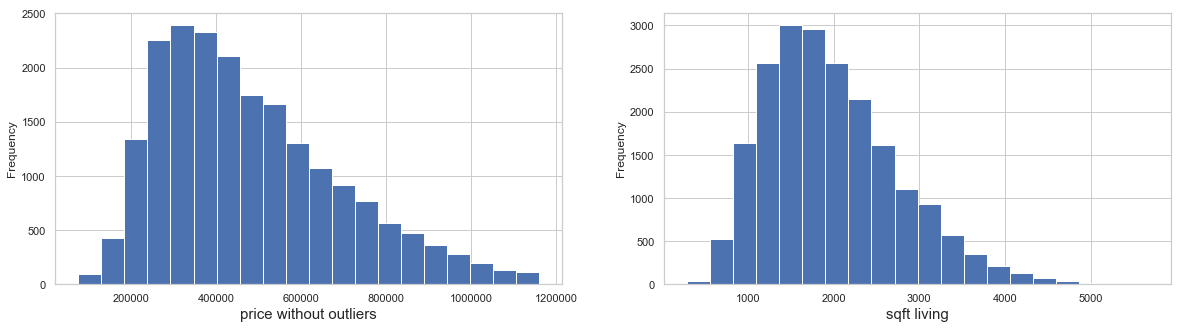

In [12]:
## histogram without outliers
plt.subplot(1, 2, 1)
house_df4.price.plot(kind='hist', figsize=(20, 5), bins=20)
plt.xlabel('price without outliers',  fontsize = 15)

plt.subplot(1, 2, 2)
house_df4.sqft_living.plot(kind='hist', figsize=(20, 5), bins=20)
plt.xlabel('sqft living',  fontsize = 15)


## skewness, kurtosis, mean, and median values
print("Skewness of price: %f" % house_df4.price.skew())
print("Kurtosis of price: %f" % house_df4.price.kurt())
print('Average price paid = $ %d' % np.mean(house_df4.price))
print('Median price paid  = $ %d' % np.median(house_df4.price))

plt.show()
# Price:
# Around 2014 and 2015 at King County (greater Seattle Area), the most frequently sold properties were at price range of $300k and $400k.
# After $400k price, the property availability decreases for each $100k price increase.
# Sqft Living:
# Around 2014 and 2015 at King County (greater Seattle Area), the most frequently sold properties were at living space range of 1500 sqft and 2000 sqft. 
# After 2000 sqft, the property availability decreases for each additional 500 sqft increase. 

#### Price vs. Waterfront & View

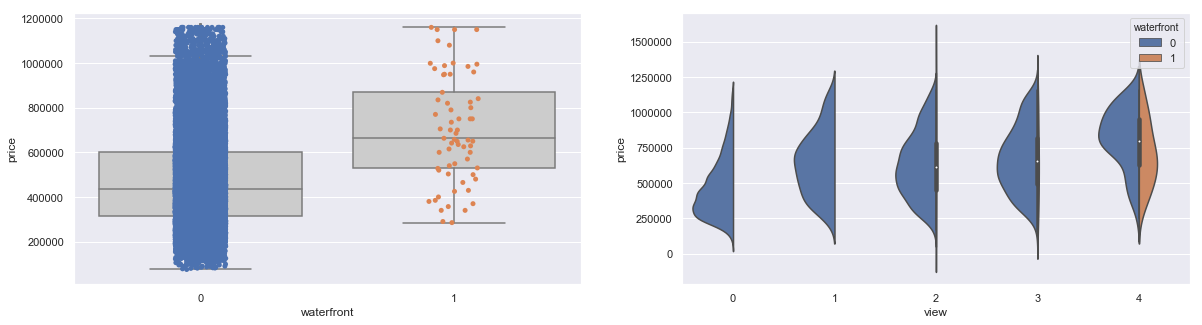

In [21]:
## https://seaborn.pydata.org/generated/seaborn.violinplot.html
## Waterfront vs Sale Price

sns.set(rc={'figure.figsize':(20,5)})

plt.subplot(1, 2, 1)
sns.boxplot(x='waterfront', y='price', color=".8",data = house_df4)
sns.stripplot(x='waterfront', y='price', data = house_df4)

plt.subplot(1, 2, 2)
sns.violinplot(x='view', y='price', hue = 'waterfront', data = house_df4, scale = 'count', split = True)
### sns.swarmplot(x='view', y='price', hue = 'waterfront', data = house_df4)

plt.show()

# Waterfront:
# Waterfront properties are more expensive. However, fewer waterfront properties are sold.
# Most common non-waterfront property price is between $250k and $450k.
# View:
# The highest view score which is 4 had waterfront properties. 
# However, view 4 is more expensive than waterfront properties.

#### Price vs. Bedroom & Bathrooms

C:\Users\asidd\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


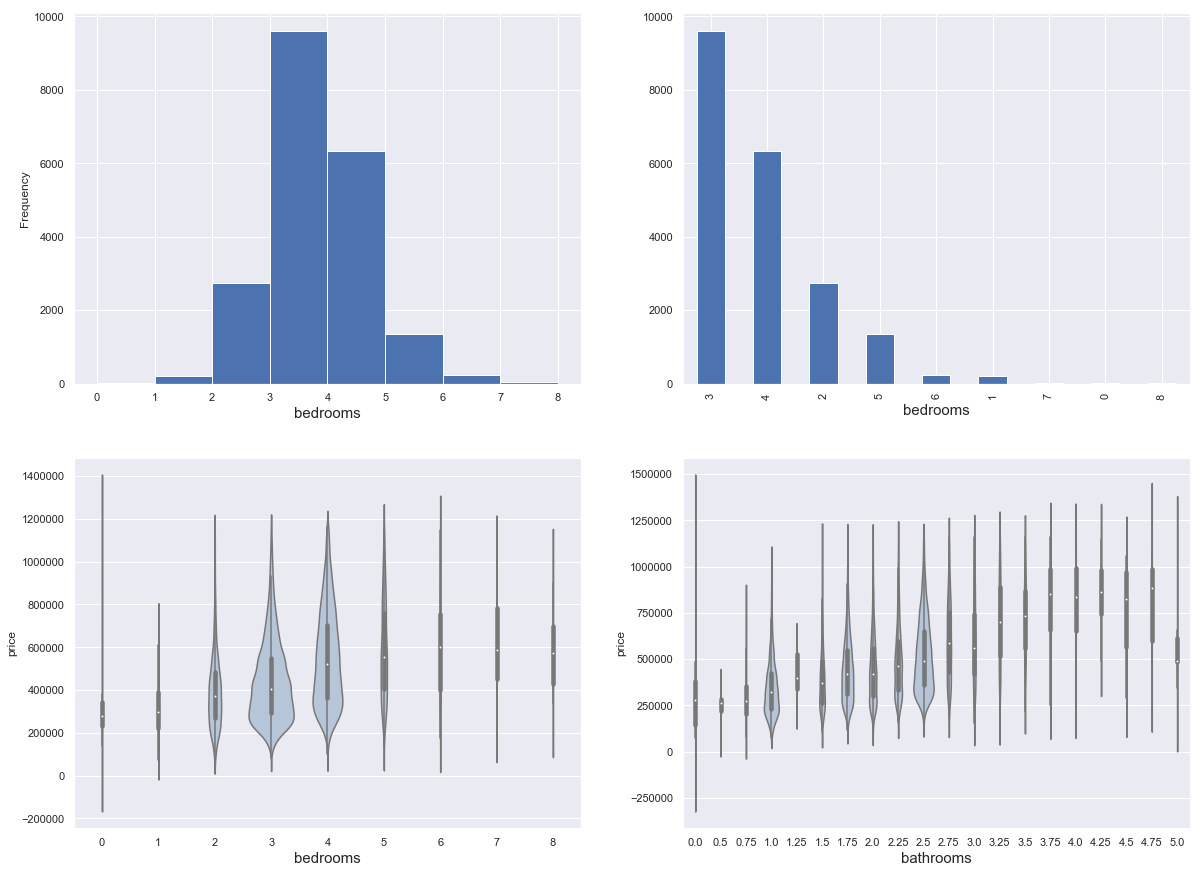

In [24]:
## Bedrooms vs Sale Price

plt.subplot(2, 2, 1)
house_df4.bedrooms.plot(kind='hist', figsize=(20, 15), bins=8)
plt.xlabel('bedrooms',  fontsize = 15)

plt.subplot(2, 2, 2)
house_df4.bedrooms.value_counts().plot(kind='bar', figsize=(20, 15), color="C0")
plt.xlabel('bedrooms',  fontsize = 15)

#sns.set(rc={'figure.figsize':(12,8)})
plt.subplot(2, 2, 3)
sns.violinplot(x='bedrooms', y='price', data = house_df4, color = 'lightsteelblue', scale = 'count')
plt.xlabel('bedrooms',  fontsize = 15)

plt.subplot(2, 2, 4)
sns.violinplot(x='bathrooms', y='price', data = house_df4, color = 'lightsteelblue', scale = 'count')
plt.xlabel('bathrooms',  fontsize = 15)

plt.show()

# Bedrooms:
# As we can see that 3-bedroom houses were most commonly sold followed by 4 bedrooms. 
# Builders can make a new building with more 3 and 4 bedroom’s to attract more buyers.
# So now we know that 3 and 4 bedrooms were the highest selling.
# Most of the bedrooms were sold between the price range of $200k and $600k.
# Bathrooms:
# As we can see that 2.5-bathroom houses are most commonly sold followed by 1 bathroom. 
# Builders can make a new building with more 2.5 and 1 bathrooms to attract more buyers.
# So now we know that 2.5 and 1 bathrooms are the highest selling.

#### Price vs. Living Area

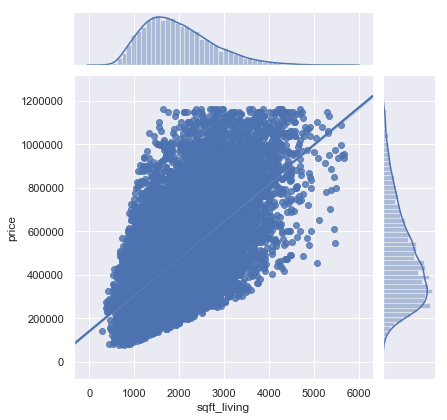

In [15]:
## Living Area vs Sale Price
sns.jointplot(x=house_df4['sqft_living'], y=house_df4['price'], kind='reg')

# It makes sense that people would pay for the more living area. 
# Most common living area is between 1000 and 2500 sq. ft.
# Most common price range is between $250k and $500k.
# As we can see that 2.5-bathroom houses are most commonly sold followed by 1 bathroom. 

#### Price vs. Date

C:\Users\asidd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asidd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


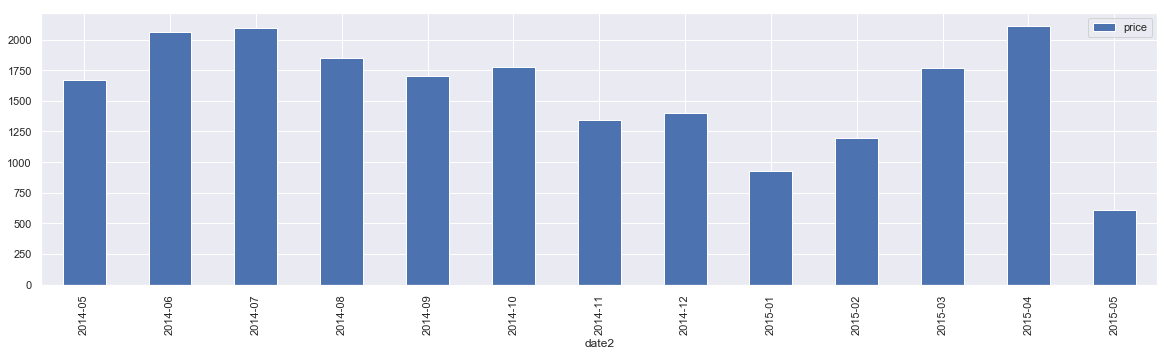

In [25]:
## reformat the date and extract month and year

house_df4['date2'] = pd.to_datetime(house_df4.date, format='%Y%m%d', errors='ignore')
house_df4['date2'] = pd.to_datetime(house_df4.date, format='%Y%m%d', errors='ignore').dt.to_period('M')

## pivot price by month and year
test1 = pd.pivot_table(house_df4, index= 'date2', values= "price", aggfunc='count')
test1.plot(kind= 'bar', figsize=(20, 5))

# The slowest months are during fall and winter seasons. April, June, and July months are the busiest times.

#### Price vs. Location (density)

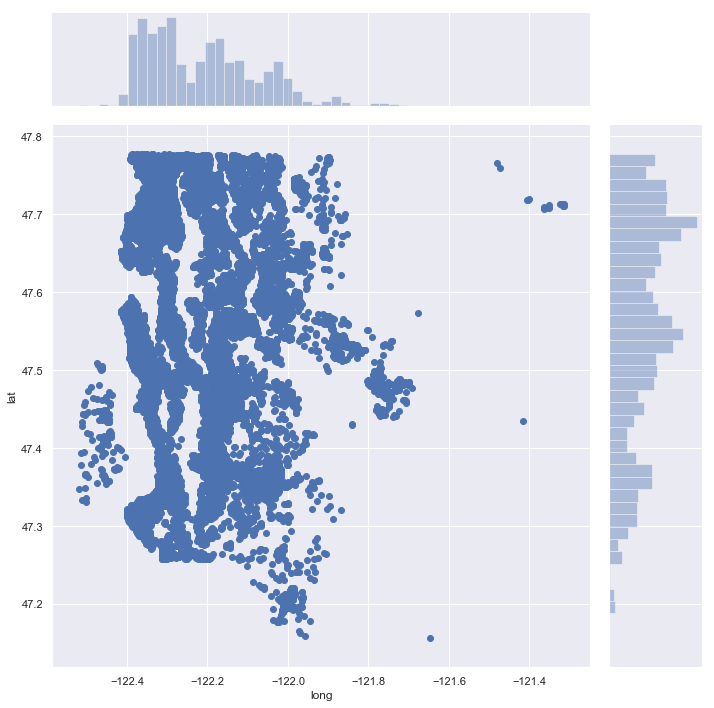

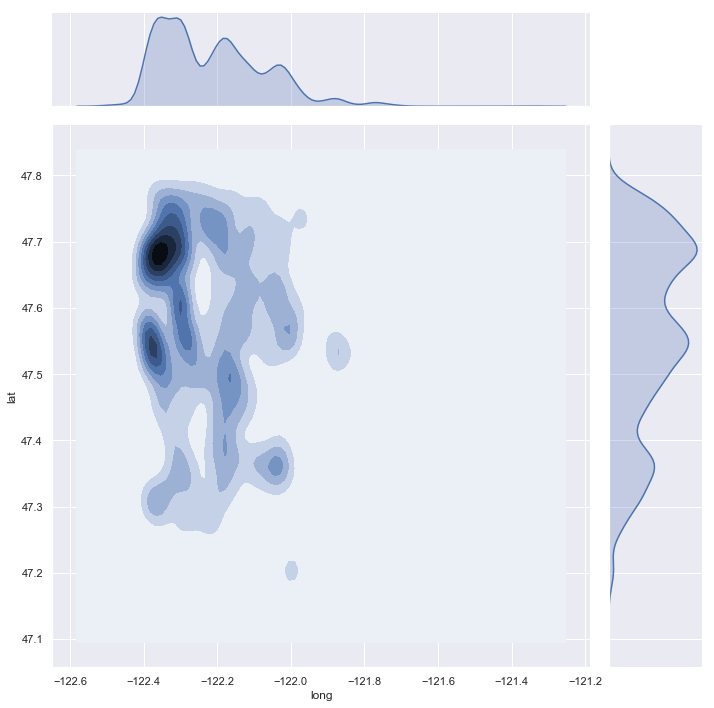

In [26]:
## Property Sale Price vs. Location Desnity
## https://stackoverflow.com/questions/41009215/importerror-no-module-named-geopandas
## Aconda Prompt: conda install -c conda-forge folium
## https://alcidanalytics.com/p/geographic-heatmap-in-python
## https://python-visualization.github.io/folium/plugins.html
import geopandas as gpd
import folium
from folium.plugins import HeatMap

sns.jointplot(x=house_df4['long'], y=house_df4['lat'], height = 10)
sns.jointplot(x=house_df4['long'], y=house_df4['lat'], kind='kde', height = 10)

folium.Map(location=[47.5, -122], zoom_start=9)

# We can find out ideal locations and here is the densier locations where most of properties are sold:
# There are many properties sold at these latitudes: around 47.7 and between 47.6 and 47.5.
# Also, there are many properties sold at these longitude: between -122.4 to -122.2 
# Most of the properties were sold in West Seattle, North Seattle, and close to the waterfront

#### Price vs. Location (Heatmap)

C:\Users\asidd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


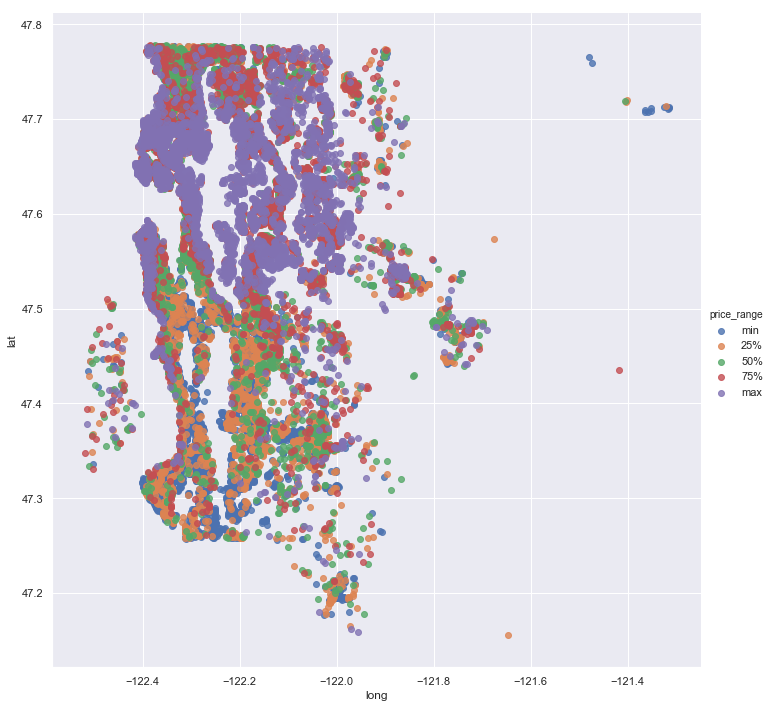

In [27]:
# pd.qcut(house_df4.price, [0,0.25,0.5,0.75,1], labels=["min", "25%", "50%","75%", "max"])
house_df4['price_range'] = pd.qcut(house_df4.price, 5, labels=["min", "25%", "50%","75%", "max"])
sns.lmplot(x='long', y='lat', hue='price_range', data=house_df4, fit_reg=False, height=10)

# The most expensive neighborhoods were North Seattle, University of Washington, Mercer Island, Medina, Bellevue, Redmond, and properties along the waterfront area. 
# Least expensive neighborhoods were South Seattle, further North Seattle, and properties away from water.  

#### Conclusion:

According to the linear regression model, the property sale price is changed by additional amenities such as the number of bedrooms, bathrooms, living space, waterfront, and views

*	Each one-unit increase in bedrooms causes a decrease of \$25,490 in the price.
*	Each one-unit increase in bathrooms causes an increase of \$12,946 in the price.
*	Each waterfront property causes an increase of \$52,312 in its price.
*	Each one-unit increase in the view of a property causes an increase of \$43,819 in its price.
*	Each square-footage increase in the area causes an increase of \$174 in the price.

Price:

*	Most expensive property was sold at a price of \$7.7M million
*	Around 2014 and 2015 at King County (greater Seattle Area), the most frequently sold properties were at price range of \\$300k and \\$400k.
*	After \\$400k price, the property availability decreases for each \\$100k price increase.

Waterfront:

*	Waterfront properties are more expensive. However, fewer waterfront properties are sold.
*	Most common non-waterfront property price is between \\$250k and \\$450k.

View:

*	The highest view score which is 4 had waterfront properties. 
*	However, view 4 is more expensive than waterfront properties.

Bedrooms:

*	As we can see that 3-bedroom houses were most commonly sold followed by 4 bedrooms. 
*	Builders can make a new building with more 3 and 4 bedroom’s to attract more buyers.
*	So now we know that 3 and 4 bedrooms were the highest selling.
*	Most of the bedrooms were sold between the price range of \\$200k and \\$600k.

Bathrooms:

*	As we can see that 2.5-bathroom houses are most commonly sold followed by 1 bathroom. 
*	Builders can make a new building with more 2.5 and 1 bathrooms to attract more buyers.
*	So now we know that 2.5 and 1 bathrooms are the highest selling.

Living Area:

*	Around 2014 and 2015 at King County (greater Seattle Area), the most frequently sold properties were at living space range of 1500 sqft and 2000 sqft. 
*	After 2000 sqft, the property availability decreases for each additional 500 sqft increase.
*	It makes sense that people would pay for the more living area. 
*	Most common living area is between 1000 and 2500 sq. ft.
*	Most common price range is between \\$250k and \\$500k.
*	As we can see that 2.5-bathroom houses are most commonly sold followed by 1 bathroom.

Time:

*	The slowest months are during fall and winter seasons. April, June, and July months are the busiest times.

Location:

*	We can find out ideal locations and here are the denser locations where most of properties are sold.
*	There are many properties sold at these latitudes: around 47.7 and between 47.6 and 47.5.
*	Also, there are many properties sold at these longitudes: between -122.4 to -122.2 
*	Most of the properties were sold in West Seattle, North Seattle, and close to the waterfront.
*	The most expensive neighborhoods were North Seattle, University of Washington, Mercer Island, Medina, Bellevue, Redmond, and properties along the waterfront area. 
*	Least expensive neighborhoods were South Seattle, further North Seattle, and the properties away from water.